In [ ]:
import numpy as np

def softmax(x):
 exp_x = np.exp(x)
 return exp_x / np.sum(exp_x)

In [ ]:
x = np.array([-1, 0, 1])

# Softmax
print(softmax(x)) # [0.09003057 0.24472847 0.66524096]


[0.09003057 0.24472847 0.66524096]


### Plot Softmax

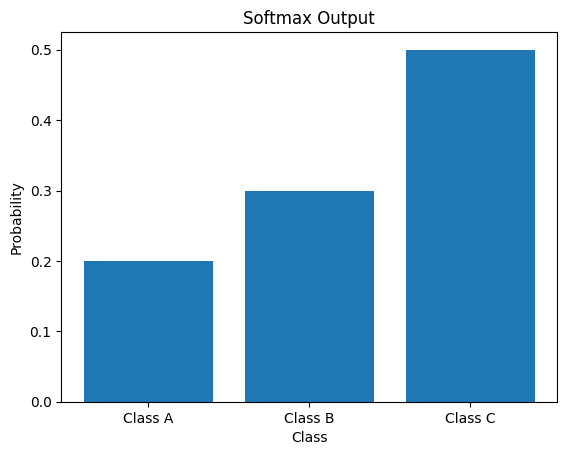

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_softmax(probabilities, class_labels):
 plt.bar(class_labels, probabilities)
 plt.xlabel("Class")
 plt.ylabel("Probability")
 plt.title("Softmax Output")
 plt.show()
# Example usage:
class_labels = ["Class A", "Class B", "Class C"]
probabilities = np.array([0.2, 0.3, 0.5])
plot_softmax(probabilities, class_labels)

### Implementation of softmax in a neural network using the MNIST dataset

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28 * 28).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28 * 28).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Convert labels to one-hot encodings
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


def softmax(x):
 exp_x = np.exp(x)
 return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Build the model
model = keras.Sequential([ layers.Dense(128, input_shape=(28 * 28,), activation='softmax'),
 layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6577 - loss: 1.6864
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7255 - loss: 0.7791
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7688 - loss: 0.6171
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8413 - loss: 0.5176
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8851 - loss: 0.4349
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8786 - loss: 0.4369
Test Loss: 0.4049129784107208
Test Accuracy: 0.8906000256538391
